In [4]:
import numpy as np

q_star = np.ones(10)

class k_arm_bandit():
    def __init__(self, k = 10, q_star =np.zeros(10,dtype=np.float32)):
        self.k = k
        self.q_star = q_star
        self.q_est = np.zeros_like(self.q_star) + 5
        self.r = np.zeros((k,2000),dtype=np.float32)
        self.action_count = np.ones_like(self.q_est)
    def action_update(self,alpha=1,eps=None):
        opt_action = np.argmax(self.q_star)
        if np.random.rand() > eps is not None:
            a = np.argmax(self.q_est)
        else:
            a = np.random.choice(len(self.q_star))

        r_t = np.random.normal(loc = self.q_star[a]) #R_{t}
        
        self.action_count[a] +=1
        self.q_est[a] = self.q_est[a] + alpha[a]*(r_t-self.q_est[a])

        self.q_star += np.random.normal(scale=0.01,size = self.q_star.shape)

        return r_t,int(a==opt_action)

T = 5000
r_dic = {'avg-greedy':np.zeros((T)),'avg-eps':np.zeros((T)),
         'const-greedy':np.zeros((T)),'const-eps':np.zeros((T))}
opt_dic = {k:np.zeros(T) for k in r_dic}

for alph in ['avg','const']:
    for eps in [0, 0.1]:
        if eps ==0:
            key = alph+'-greedy'
        else:
            key = alph+'-eps'
        for run in range(2000):
            B = k_arm_bandit(q_star = np.random.normal(loc = 0))
            B = k_arm_bandit()
            
            for t in range(T):
                # B.mod()
                if alph == 'avg':
                    r,opt_act_yes = B.action_update(alpha=1/B.action_count,eps=eps)
                else:
                    r,opt_act_yes = B.action_update(alpha=np.array([0.1]*10),eps=eps)
                r_dic[key][t] += r/2000

                opt_dic[key][t]+=opt_act_yes/2000

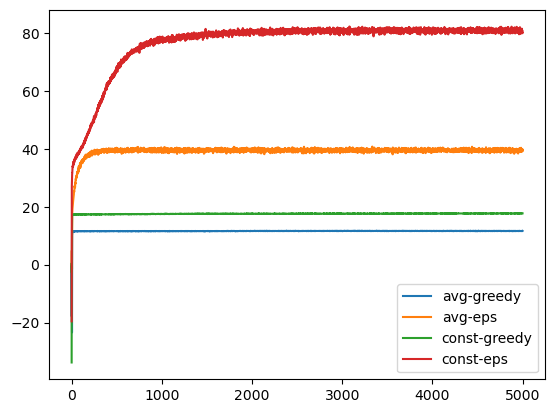

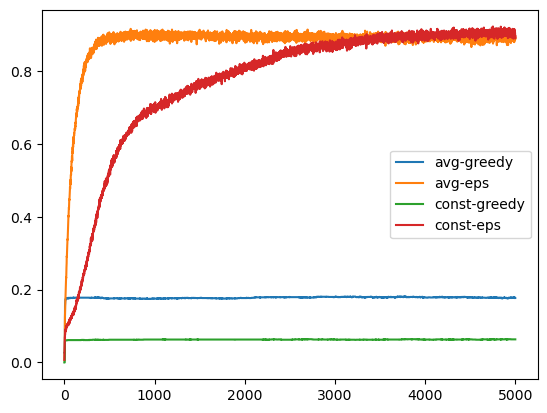

In [5]:
### below graph is for realistic q_est, when initialised to 5
import matplotlib.pyplot as plt
for k in r_dic:
    # plt.scatter(x=np.arange(len(r_dic[k])),y=r_dic[k],label=k)
    # plt.legend(loc='best')
    # plt.show()
    plt.plot(r_dic[k],label=k)
plt.legend(loc='best')
plt.show()
import matplotlib.pyplot as plt
for k in opt_dic:
    # plt.scatter(x=np.arange(len(r_dic[k])),y=r_dic[k],label=k)
    # plt.legend(loc='best')
    # plt.show()
    plt.plot(opt_dic[k],label=k)
plt.legend(loc='best')
plt.show()

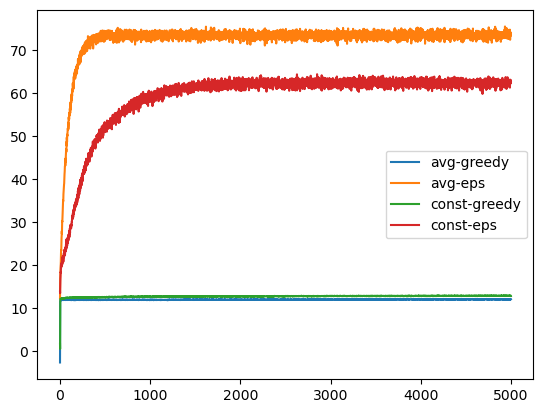

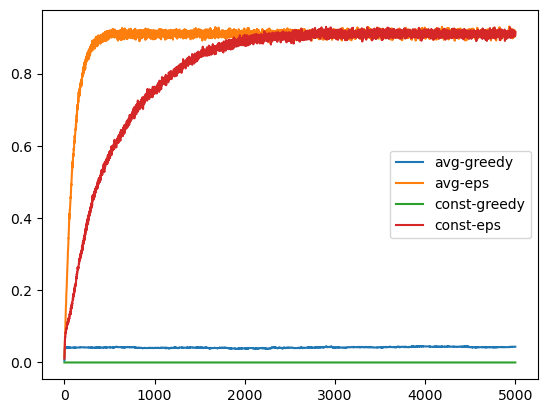

In [3]:
### below graph is for realistic q_est, when initialised to 0
import matplotlib.pyplot as plt
for k in r_dic:
    # plt.scatter(x=np.arange(len(r_dic[k])),y=r_dic[k],label=k)
    # plt.legend(loc='best')
    # plt.show()
    plt.plot(r_dic[k],label=k)
plt.legend(loc='best')
plt.show()
import matplotlib.pyplot as plt
for k in opt_dic:
    # plt.scatter(x=np.arange(len(r_dic[k])),y=r_dic[k],label=k)
    # plt.legend(loc='best')
    # plt.show()
    plt.plot(opt_dic[k],label=k)
plt.legend(loc='best')
plt.show()